Read CSV

In [17]:
import csv
import numpy as np 
import pandas as pd


data = pd.read_csv("dataset_left.csv")

In [18]:
data

,timestamp,displacement
0,2024-07-19 20:00:05,273.536763
1,2024-07-19 20:00:06,272.046915
2,2024-07-19 20:00:07,274.070623
3,2024-07-19 20:00:08,271.232968
4,2024-07-19 20:00:09,270.861092
...,...,...
647992,2024-07-27 07:59:57,275.228871
647993,2024-07-27 07:59:58,275.030999
647994,2024-07-27 07:59:59,274.970182
647995,2024-07-27 08:00:00,274.983518


In [19]:

data.set_index("timestamp", inplace=True)

In [23]:
data

,displacement
timestamp,
2024-07-19 20:00:05,273.536763
2024-07-19 20:00:06,272.046915
2024-07-19 20:00:07,274.070623
2024-07-19 20:00:08,271.232968
2024-07-19 20:00:09,270.861092
...,...
2024-07-27 07:59:57,275.228871
2024-07-27 07:59:58,275.030999
2024-07-27 07:59:59,274.970182


In [24]:
data

,displacement
timestamp,
2024-07-19 20:00:05,273.536763
2024-07-19 20:00:06,272.046915
2024-07-19 20:00:07,274.070623
2024-07-19 20:00:08,271.232968
2024-07-19 20:00:09,270.861092
...,...
2024-07-27 07:59:57,275.228871
2024-07-27 07:59:58,275.030999
2024-07-27 07:59:59,274.970182


In [16]:
# data.index = pd.to_datetime(data.index)
# df_resampled = data.resample('1S').mean()

# df_resampled.to_csv("dataset_left.csv")

C:\Users\Visal Kao\AppData\Local\Temp\ipykernel_30760\3829421937.py:2: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df_resampled = data.resample('1S').mean()


,displacement
timestamp,
2024-07-19 20:00:05,273.536763
2024-07-19 20:00:06,272.046915
2024-07-19 20:00:07,274.070623
2024-07-19 20:00:08,271.232968
2024-07-19 20:00:09,270.861092
...,...
2024-07-19 20:32:59,276.374656
2024-07-19 20:33:00,275.070891
2024-07-19 20:33:01,276.576425


Text(0, 0.5, 'Target Variable')

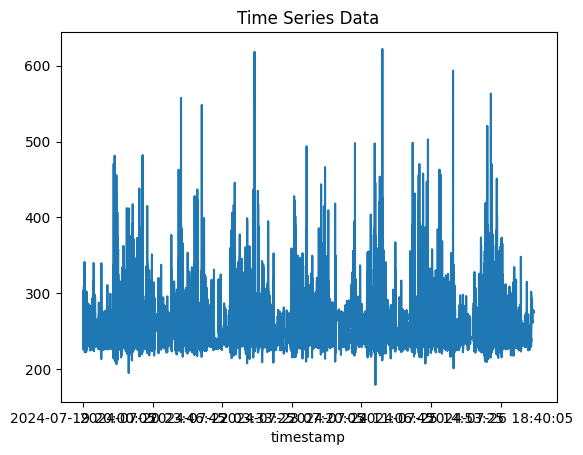

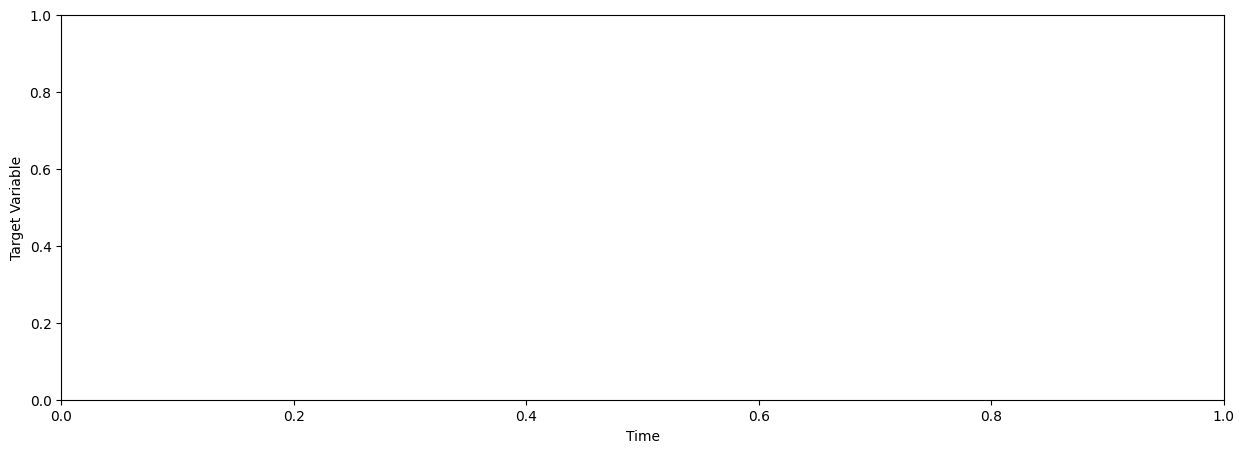

In [29]:
import matplotlib.pyplot as plt

# Assuming `data` is your dataframe and the time series is in a column `target`
data['displacement'].plot()

plt.title('Time Series Data')
plt.figure(figsize=(15,5))
plt.xlabel('Time')
plt.ylabel('Target Variable')
plt.show()


In [8]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['displacement'].head(1000))
print(f'p-value: {result[1]}')
if result[1] < 0.05:
    print("The data is stationary.")
else:
    print("The data is not stationary. Differencing might be needed.")


p-value: 1.536311523764834e-07
The data is stationary.


C:\Users\Visal Kao\AppData\Local\Temp\ipykernel_30760\2006385326.py:31: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train['displacement'] = train['displacement'].fillna(method='ffill')
C:\Users\Visal Kao\AppData\Local\Temp\ipykernel_30760\2006385326.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['displacement'] = train['displacement'].fillna(method='ffill')
c:\Users\Visal Kao\.conda\envs\2IA_ML_ADVANCED\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Visal Kao

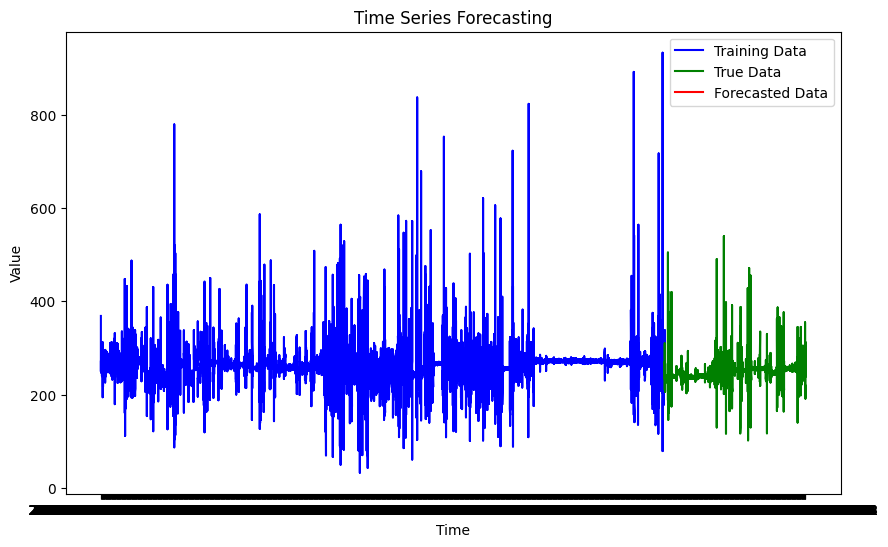

In [9]:
# import pandas as pd
# from statsmodels.tsa.arima.model import ARIMA
# import matplotlib.pyplot as plt

# # Load the data (ensure 'timestamp' is your time column and 'target' is the column you're forecasting)
# # data = pd.read_csv('your_time_series_data.csv', parse_dates=['timestamp'], index_col='timestamp')

# # Check for stationarity and differencing if needed
data = data.head(100000)
# # Split into train and test
# train_size = int(len(data) * 0.8)
# train, test = data[:train_size], data[train_size:]

# # Fit ARIMA model (adjust p, d, q based on your data)
# model = ARIMA(train['displacement'], order=(5,1,0))
# model_fit = model.fit()

# # Forecast the test set
# forecast = model_fit.forecast(steps=len(test))

# Plot the results
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'data' is your DataFrame, 'timestamp' is the datetime column, and 'target' is the value you're forecasting

# Split into train and test (80% train, 20% test for example)
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]
train['displacement'] = train['displacement'].fillna(method='ffill')
# Fit ARIMA model (adjust p, d, q based on your data)
model = ARIMA(train['displacement'], order=(1,0,3))  # Adjust (p, d, q) based on your dataset
model_fit = model.fit()

# Forecast the test set
forecast = model_fit.forecast(steps=len(test))

# Create a DataFrame for the forecast with the same index as the test set
forecast_index = test.index
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecast'])

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(train.index, train['displacement'], label='Training Data', color='blue')
plt.plot(test.index, test['displacement'], label='True Data', color='green')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecasted Data', color='red')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Forecasting')
plt.show()



In [10]:
# from pmdarima import auto_arima

# model_auto = auto_arima(train['displacement'], seasonal=False, stepwise=True, trace=True)
# model_auto.summary()

forecast_df

,Forecast
timestamp,
2024-07-19 20:26:28,NaN
2024-07-19 20:26:28,NaN
2024-07-19 20:26:28,NaN
2024-07-19 20:26:28,NaN
2024-07-19 20:26:28,NaN
...,...
2024-07-19 20:33:03,NaN
2024-07-19 20:33:03,NaN
2024-07-19 20:33:03,NaN


In [ ]:
import tensorflow as tf
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
from tensorflow.keras import layers, models

In [ ]:



def unet_1d(input_shape, num_classes):
    inputs = layers.Input(shape=input_shape)
    
    # Encoder
    conv1 = layers.Conv1D(64, kernel_size=3, padding="same", activation="relu")(inputs)
    conv1 = layers.Conv1D(64, kernel_size=3, padding="same", activation="relu")(conv1)
    pool1 = layers.MaxPooling1D(pool_size=2)(conv1)
    
    conv2 = layers.Conv1D(128, kernel_size=3, padding="same", activation="relu")(pool1)
    conv2 = layers.Conv1D(128, kernel_size=3, padding="same", activation="relu")(conv2)
    pool2 = layers.MaxPooling1D(pool_size=2)(conv2)
    
    conv3 = layers.Conv1D(256, kernel_size=3, padding="same", activation="relu")(pool2)
    conv3 = layers.Conv1D(256, kernel_size=3, padding="same", activation="relu")(conv3)
    pool3 = layers.MaxPooling1D(pool_size=2)(conv3)
    
    # Bottleneck
    conv4 = layers.Conv1D(512, kernel_size=3, padding="same", activation="relu")(pool3)
    conv4 = layers.Conv1D(512, kernel_size=3, padding="same", activation="relu")(conv4)
    
    # Decoder
    up5 = layers.UpSampling1D(size=2)(conv4)
    print(up5)
    print(conv3)
    # conv3_resized = layers.Cropping1D(cropping=(0, 1))(conv3)
    concat5 = layers.Concatenate()([up5, conv3])
    conv5 = layers.Conv1D(256, kernel_size=3, padding="same", activation="relu")(concat5)
    conv5 = layers.Conv1D(256, kernel_size=3, padding="same", activation="relu")(conv5)
    
    up6 = layers.UpSampling1D(size=2)(conv5)
    print(up6)
    print(conv2)
    # Example of resizing data
    # conv2_resized = resize_to_match(conv2, tf.shape(up6)[1])
    # conv2_resized = layers.Lambda(lambda x: tf.squeeze(x, axis=2))(conv2_resized)  # Remove the extra dimension

    concat6 = layers.Concatenate()([up6, conv2])
    conv6 = layers.Conv1D(128, kernel_size=3, padding="same", activation="relu")(concat6)
    conv6 = layers.Conv1D(128, kernel_size=3, padding="same", activation="relu")(conv6)
    
    up7 = layers.UpSampling1D(size=2)(conv6)
    concat7 = layers.Concatenate()([up7, conv1])
    conv7 = layers.Conv1D(64, kernel_size=3, padding="same", activation="relu")(concat7)
    conv7 = layers.Conv1D(64, kernel_size=3, padding="same", activation="relu")(conv7)
    
    # Output
    outputs = layers.Conv1D(num_classes, kernel_size=1, activation="softmax")(conv7)
    
    model = models.Model(inputs, outputs)
    return model

# # Model Parameters
# input_shape = (647995, 2)  
# num_classes = 7
# model = unet_1d(input_shape, num_classes)

# # Model Summary
# model.summary()

In [ ]:
import csv
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder


data = pd.read_csv("full_dataset.csv", index_col="timestamp")

data = data.iloc[:450000, :]
X = data[["displacement_left","displacement_right"]].values
y = data['Activity'].values 

# X = np.load("X_train.npy")
# y = np.load("y_train.npy")

num_classes = len(np.unique(y))
# num_classes = 7
len_x = len(X) 
encoder = OneHotEncoder(sparse_output=False)
y_one_hot = encoder.fit_transform(y.reshape(-1, 1))  

X = X.reshape((1, len_x, 2)) 
y_one_hot = y_one_hot.reshape((1, len_x, num_classes)) 

# len(X)
# X = X[0:1,:,:]
# y = y[0:1,:,:]
X.shape

(1, 450000, 2)

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# Define the model
input_shape = (len_x, 2)  # Example input shape
print(input_shape)
print(num_classes)
model = unet_1d(input_shape, num_classes)

model.summary()
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

# Example training data
# import numpy as np
# X_train = np.random.rand(100, 100, 1)  # 100 samples, 100 time steps, 1 feature
# y_train = np.random.randint(0, num_classes, (100, 100, num_classes))  # One-hot encoded labels

# Train the model
# X = np.expand_dims(X, axis=0)  # Adds a batch dimension
# X = np.expand_dims(X, axis=1)  # Adds the time steps dimension

model.fit(X, y_one_hot, epochs=100, batch_size=1)


(450000, 2)
7
<KerasTensor shape=(None, 112500, 512), dtype=float32, sparse=False, name=keras_tensor_552>
<KerasTensor shape=(None, 112500, 256), dtype=float32, sparse=False, name=keras_tensor_548>
<KerasTensor shape=(None, 225000, 256), dtype=float32, sparse=False, name=keras_tensor_556>
<KerasTensor shape=(None, 225000, 128), dtype=float32, sparse=False, name=keras_tensor_545>


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_24      │ (None, 450000, 2) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_321 (Conv1D) │ (None, 450000,    │        448 │ input_layer_24[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_322 (Conv1D) │ (None, 450000,    │     12,352 │ conv1d_321[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_69    │ (None, 225000,    │          0 │ conv1d_322[0][0]  │
│ (MaxPooling1D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_323 (Conv1D) │ (None, 225000,    │     24,704 │ max_pooling1d_69… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_324 (Conv1D) │ (None, 225000,    │     49,280 │ conv1d_323[0][0]  │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_70    │ (None, 112500,    │          0 │ conv1d_324[0][0]  │
│ (MaxPooling1D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_325 (Conv1D) │ (None, 112500,    │     98,560 │ max_pooling1d_70… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_326 (Conv1D) │ (None, 112500,    │    196,864 │ conv1d_325[0][0]  │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_71    │ (None, 56250,     │          0 │ conv1d_326[0][0]  │
│ (MaxPooling1D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_327 (Conv1D) │ (None, 56250,     │    393,728 │ max_pooling1d_71… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_328 (Conv1D) │ (None, 56250,     │    786,944 │ conv1d_327[0][0]  │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling1d_67    │ (None, 112500,    │          0 │ conv1d_328[0][0]  │
│ (UpSampling1D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_67      │ (None, 112500,    │          0 │ up_sampling1d_67… │
│ (Concatenate)       │ 768)              │            │ conv1d_326[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_329 (Conv1D) │ (None, 112500,    │    590,080 │ concatenate_67[0… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_330 (Conv1D) │ (None, 112500,    │    196,864 │ conv1d_329[0][0]  │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling1d_68    │ (None, 225000,    │          0 │ conv1d_330[0][0]

 Total params: 2,596,423 (9.90 MB)

 Trainable params: 2,596,423 (9.90 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.0631 - loss: 40.6280
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.0631 - loss: 31.8925
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.0631 - loss: 24.4961
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.0631 - loss: 18.3599
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.0631 - loss: 13.2675
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.0628 - loss: 9.3239
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.0120 - loss: 7.8539
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.0120 - loss: 5.6507
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.0125 - loss: 2.4849
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.8983 - loss: 0.7132
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.8987 - loss: 0.7878
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.8987 - loss: 0.9900
Epoch 

In [ ]:
    # Predict the segmentation labels
predicted_labels = model.predict(X)
print(predicted_labels)
# Convert the predicted labels back to class indices
predicted_classes = np.argmax(predicted_labels, axis=-1)
print(predicted_classes)
predicted_classes

# import matplotlib.pyplot as plt

# # Plot the original time series data
# plt.figure(figsize=(14, 7))
# plt.subplot(2, 1, 1)
# plt.plot(data.index, data['displacement_left'], label='Feature 1')
# plt.plot(data.index, data['displacement_right'], label='Feature 2')
# plt.title('Original Time Series Data')
# plt.xlabel('Date')
# plt.ylabel('Feature Value')
# plt.legend()

# # Plot the predicted segmentation labels
# plt.subplot(2, 1, 2)
# plt.plot(data.index, predicted_classes[0], label='Predicted Segmentation')
# plt.title('Predicted Segmentation Labels')
# plt.xlabel('Date')
# plt.ylabel('Class')
# plt.legend()

# plt.tight_layout()
# plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[[1.99486129e-03 7.22345954e-04 1.79871975e-03 ... 7.78365182e-04
   1.01404591e-08 9.85494018e-01]
  [1.28381180e-05 9.45724787e-06 7.73482554e-07 ... 1.10333276e-04
   2.87665820e-08 9.92640316e-01]
  [3.54007312e-08 3.08204122e-04 6.16751902e-04 ... 2.21753260e-04
   9.66045093e-08 9.98552382e-01]
  ...
  [1.05925358e-03 4.82325937e-04 1.08711647e-04 ... 6.71114506e-08
   9.39647543e-06 9.98314738e-01]
  [3.33068334e-02 2.02468168e-02 1.45362597e-03 ... 4.94143890e-08
   6.49312005e-06 9.44977403e-01]
  [3.21224965e-02 1.53111126e-02 1.76824069e-05 ... 3.41957365e-03
   4.50911932e-03 9.44617748e-01]]]
[[6 6 6 ... 6 6 6]]


array([[6, 6, 6, ..., 6, 6, 6]])

array([], shape=(0, 450000, 2), dtype=float64)

In [ ]:
predicted_classes_df = pd.DataFrame(np.transpose(predicted_classes), index= None)
predicted_classes_df.to_csv("test_result.csv")
print(len(np.unique(y)))
print(len(np.unique(predicted_classes)))
predicted_classes_df

7
3


,0
0,6
1,6
2,6
3,6
4,6
...,...
449995,6
449996,6
449997,6
449998,6


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import bayesian_changepoint_detection.offline_changepoint_detection as offcd
from bayesian_changepoint_detection.generate_data import generate_normal_time_series
from functools import partial
# Generate sample data
# data = generate_normal_time_series(n=300, sigma=1, means=[0, 5, 0])

# Bayesian Change Point Detection
# data = pd.read_csv("full_dataset.csv", index_col="timestamp")
# data.iloc[:45000, :]
data = pd.read_csv("full_dataset.csv", index_col="timestamp")
data = data["displacement_right"]
data = np.array(data.iloc[:35000])

Q, P, Pcp = offcd.offline_changepoint_detection(data.iloc[:45000, :], partial(offcd.const_prior, l=(len(data)+1)), offcd.gaussian_obs_log_likelihood, truncate=-40)

plt.figure(figsize=(14, 7))
plt.plot(data)
for i in range(1, len(data)):
    plt.axvline(i, linestyle='--', color='red', alpha=Pcp[i])
plt.title('Bayesian Change Point Detection')
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

[ 8.87100749e-01  1.34307753e-02 -1.62993261e+00 -2.55483495e-01
 -2.86912879e+00 -4.27903890e-01 -8.38756403e-01 -6.14917034e-01
 -3.36181402e-02 -1.16263385e+00 -1.52454461e+00  2.54089150e-01
 -1.03543599e+00 -2.03363064e-01 -6.32070684e-01 -4.85016761e-01
 -3.38742667e-01 -1.08827605e-01 -5.78631758e-02  1.45825113e+00
 -1.86245244e+00  2.76058978e-01 -8.36372027e-01 -4.89972304e-01
  3.49591072e-02 -6.00525608e-01  1.14068434e+00  7.18428787e-01
 -6.98109072e-01  5.10798999e-01 -1.28061964e+00 -6.16604984e-02
  7.44180805e-02  1.52383893e+00 -3.77244450e-01  1.45917493e-01
  7.80624737e-01 -1.05866825e-01 -6.14763848e-01 -2.18555209e+00
  5.80979942e-01  1.53798711e+00 -1.15552408e-01 -1.44237310e+00
  1.08189365e+00 -1.69120089e-01  5.81798292e-01 -8.34642018e-01
 -3.20741810e-01 -1.70096216e+00 -1.13326269e+00 -8.34573458e-01
 -3.34924719e-01 -1.73200999e+00 -2.46338967e+00  6.09563117e-01
 -3.21838024e-02  1.38405740e-01  2.66277744e-01  3.67203130e-01
  2.52658712e-01  4.41389

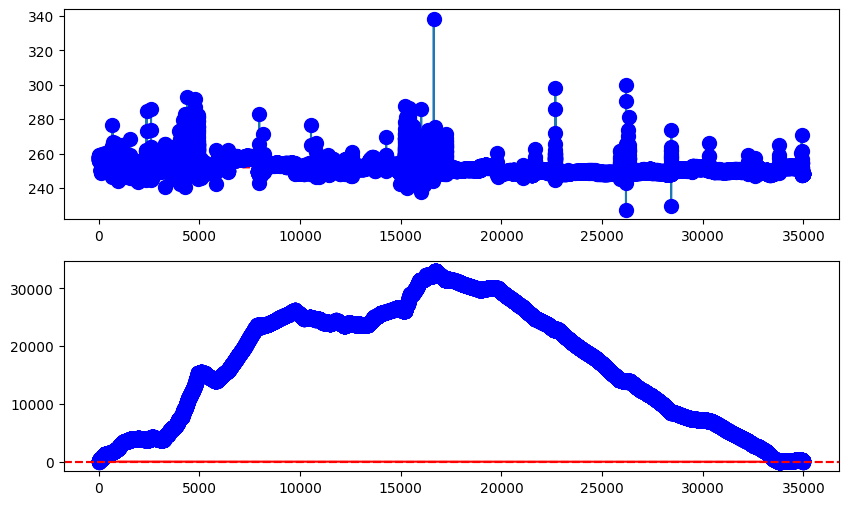

CUSUM Change Points: [    1     2     3 ... 34997 34998 34999]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def cusum(data, threshold=1, show=True, drift=0, ending=False, plot=True):
    data = np.array(data)
    x, x_mean = np.arange(len(data)), data.mean()
    s = np.zeros(len(data))
    s[1:] = np.cumsum(data[1:] - x_mean - drift)
    s_positive = np.maximum(0, s)
    s_negative = np.minimum(0, s)
    g_positive = s != s_positive
    g_negative = s != s_negative
    t = np.arange(len(g_positive))
    g_positive_indexes = t[g_positive]
    g_negative_indexes = t[g_negative]
    n = len(data)

    if ending:
        g_positive_indexes = np.append(g_positive_indexes, n)
        g_negative_indexes = np.append(g_negative_indexes, n)

    change_points = np.unique(np.concatenate((g_positive_indexes, g_negative_indexes)))

    if plot:
        plt.figure(figsize=(10, 6))
        plt.subplot(211)
        plt.plot(x, data)
        plt.plot(x, x_mean*np.ones(len(data)), color='red', linestyle='--')
        if len(change_points) > 0:
            plt.plot(change_points, data[change_points], "o", markersize=10, color='blue')
        plt.subplot(212)
        plt.plot(x, s, color='black')
        plt.plot(x, s_positive, color='green')
        plt.plot(x, s_negative, color='red')
        if len(change_points) > 0:
            plt.plot(change_points, s[change_points], "o", markersize=10, color='blue')
        plt.axhline(y=threshold, color='red', linestyle='--')
        plt.axhline(y=-threshold, color='red', linestyle='--')
        plt.show()

    return change_points

# Example usage
data = np.random.randn(300)
data[100:200] += 5  # Introduce a change point
# print(type(data))
print(data)
data = pd.read_csv("full_dataset.csv", index_col="timestamp")
data = data["displacement_right"]
data = np.array(data.iloc[:35000])
change_points = cusum(data, threshold=1, plot=True)
print("CUSUM Change Points:", change_points)


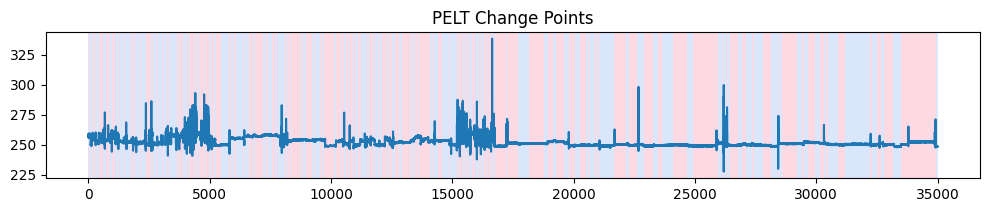

PELT Change Points: [10, 80, 90, 95, 110, 125, 130, 140, 200, 215, 240, 255, 300, 315, 335, 360, 380, 425, 430, 450, 460, 590, 595, 610, 630, 660, 670, 685, 705, 800, 810, 820, 840, 845, 865, 875, 895, 905, 915, 920, 935, 940, 965, 980, 990, 1000, 1015, 1075, 1085, 1100, 1110, 1120, 1125, 1155, 1200, 1205, 1215, 1230, 1235, 1240, 1270, 1320, 1460, 1490, 1505, 1510, 1555, 1560, 1580, 1605, 1735, 1820, 1875, 1905, 1975, 1980, 2125, 2160, 2345, 2350, 2355, 2370, 2375, 2485, 2515, 2520, 2530, 2575, 2595, 2600, 2620, 2635, 2640, 2660, 2820, 2850, 3005, 3010, 3015, 3045, 3050, 3070, 3075, 3080, 3185, 3200, 3220, 3225, 3255, 3265, 3270, 3275, 3305, 3330, 3335, 3355, 3395, 3415, 3600, 3605, 3610, 3615, 3625, 3640, 3680, 3685, 3695, 3720, 3725, 3735, 3740, 3750, 3765, 3775, 3785, 3810, 3820, 3875, 3890, 3905, 3915, 3920, 3965, 3975, 3980, 3985, 4045, 4060, 4065, 4070, 4075, 4110, 4120, 4145, 4170, 4180, 4190, 4195, 4205, 4210, 4220, 4225, 4235, 4250, 4265, 4275, 4285, 4295, 4300, 4310, 4315, 43

In [ ]:
import numpy as np
import ruptures as rpt
import matplotlib.pyplot as plt

# Generate sample data
# data = np.random.randn(300)
# data[100:200] += 5  # Introduce a change point

# PELT Change Point Detection
data = pd.read_csv("full_dataset.csv", index_col="timestamp")
data = data["displacement_right"]
data = np.array(data.iloc[:35000])
algo = rpt.Pelt(model="rbf").fit(data)
result = algo.predict(pen=1)

# Display the result
rpt.display(data, result)
plt.title('PELT Change Points')
plt.show()

print("PELT Change Points:", result)
